In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#Reading the dataset from memory

df = pd.read_excel('/content/Sample Dataset.xlsx')
df.head()

,Age,Calorie Count,Total Carbs,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Multivitamin Needed
0,50,20,4,2,10,15,2,A
1,34,25,6,2,4,190,2,B
2,40,45,8,3,6,220,6,C
3,62,30,7,2,110,10,2,D
4,34,25,5,2,0,100,2,F


In [3]:
#Bringing data to appropriate format

def pre_training(df, cols_x, cols_y) :

    X = df[cols_x]
    Y = df[cols_y]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

    return X_train, X_test, Y_train, Y_test

0.15789473684210525


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


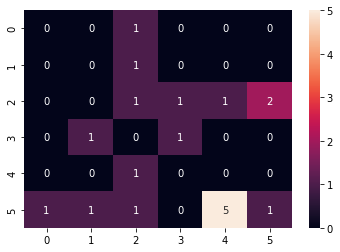

In [4]:
#Dividing data into attributes and classes
cols_x = ['Age', 'Calorie Count', 'Total Carbs', 'Dietary Fiber', 'Vitamin A', 'Vitamin C', 'Calcium']
cols_y = ['Multivitamin Needed']

#The test and train split is calculated 
X_train, X_test, Y_train, Y_test = pre_training(df, cols_x, cols_y )

#Logistic Regression used to train on given data
log_reg = LogisticRegression(solver = 'sag', random_state = 0, C = 5, max_iter = 1000)
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

#Accuracy score is calculated
score = log_reg.score(X_test, Y_test)
print(score)

#A cofusion matrix to represent the results
cf_matrix = confusion_matrix(Y_test, y_pred)

sns.heatmap(cf_matrix, annot = True)